In [20]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# to read in all the words
words=open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [22]:
len(words)

32033

In [23]:
# to build a vocabulory of charecters to/from integers like string to integer and vise versa
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate (chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
vocab_size=len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [24]:
block_size = 3 # context length: how many characters do we take to predict the next one?
#build the dataset
def build_dataset (words):# Takes some list of words
    
    X, Y =[], [] # To build the arrays for those words
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print('.join(itos [i] for i in context), '--->', itos [ix])
            context = context [1:] + [ix] # crop and append
    X =torch.tensor (X)
    Y =torch.tensor (Y)
    print (X. shape, Y.shape)
    return X, Y
import random
random.seed(42)
random.shuffle (words)# randomly shuffling up all the words
n1 = int(0.8*len (words)) # The number of examples to be 80 % of the words
n2 =int(0.9*len (words)) # The number of examples to be 90 % of the words
Xtr, Ytr = build_dataset (words[:n1]) # Calling this function for building the training set Xtr and Ytr by indexing upto n1 ie 80 % training words
Xdev, Ydev = build_dataset (words [n1: n2])# Calling this fuction for building dev dataset Xdev and Y dev by indexing upto n2-n1 3000 examples
Xte, Yte =build_dataset (words [n2:])# Calling this function for building test dataset Xte and Yte by indexing len(words)-n2 as our examples for the test set

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [113]:
n_embd=10 # dimentionality of the charecter emmbedding vectors
n_hidden=200# no of neurons in the hidden layer of the MLP
g = torch. Generator().manual_seed (2147483647) # for reproducibility
C = torch.randn((vocab_size, n_embd), generator=g)
W1 =torch. randn((block_size* n_embd, n_hidden), generator=g)*0.1
b1 =torch.randn (n_hidden, generator=g)*0.01
W2 =torch. randn((n_hidden, vocab_size), generator=g)*0.01 # here we multiply the parameters with 0.01 amd 0 to reduse the greater initial loss and let the model optimise the loss function instead of squizing the values from the parameters to a higher loss
b2 =torch.randn (vocab_size, generator=g)*0
parameters = [C, W1, b1, W2, b2]
print (sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True



11897


In [201]:
# Same code befor written good here
max_steps=200000
batch_size=32
lossi=[]

for i in range  (max_steps):

    #Constructing a mini batch
    ix= torch.randint(0,Xtr.shape[0],(batch_size,),generator=g)
    Xb , Yb =Xtr[ix], Ytr[ix] #batch x,y

    # forward pass
    emb =C[Xb] # embed the characters into vectors
    embcat = emb.view (emb.shape[0], -1) # concatenate the vectors
    hpreact =embcat @ W1 + b1 # hidden layer pre-activation
    h = torch.tanh (hpreact) # hidden layer
    logits =h @ W2 + b2 # output layer
    loss = F. cross_entropy (logits, Yb) # loss function

    #Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    # lr=lrs[i]
    lr=0.1 if i > 100000  else 0.01
    for p in parameters:
        p.data+= -lr *p.grad

    # # Track Stats
    
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    # break
# print(loss.item())

      0/ 200000: 3.0703
  10000/ 200000: 2.2924
  20000/ 200000: 2.9331
  30000/ 200000: 2.5900
  40000/ 200000: 2.3502
  50000/ 200000: 2.2967
  60000/ 200000: 1.9347
  70000/ 200000: 2.3354
  80000/ 200000: 2.2107
  90000/ 200000: 2.5865
 100000/ 200000: 1.9137
 110000/ 200000: 1.8769
 120000/ 200000: 2.2145
 130000/ 200000: 1.9580
 140000/ 200000: 1.9250
 150000/ 200000: 2.1793
 160000/ 200000: 1.9860
 170000/ 200000: 2.1019
 180000/ 200000: 1.7853
 190000/ 200000: 1.9285


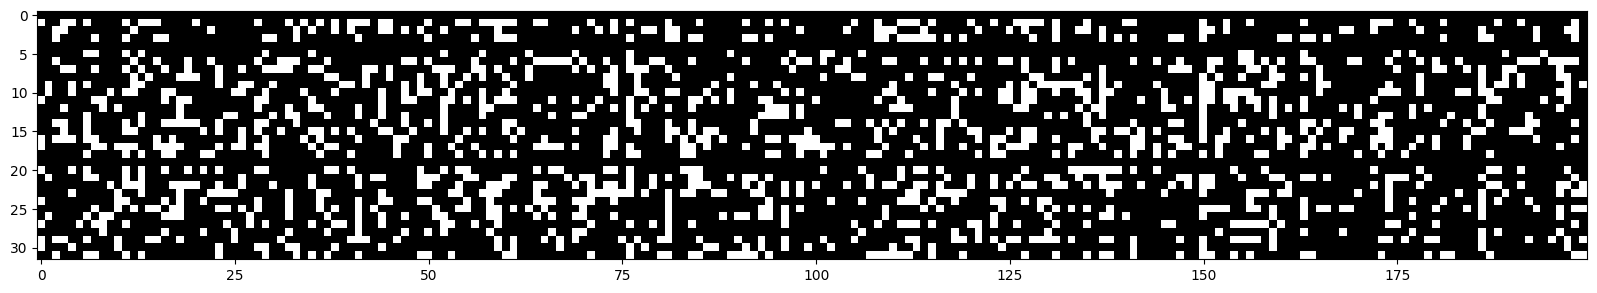

In [202]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs()>0.99 , cmap='gray', interpolation='nearest')

In [203]:
h

tensor([[-0.0207,  0.0219,  0.0120,  ..., -0.1090,  0.2941, -0.1802],
        [ 0.9989, -0.2555, -0.9084,  ...,  0.8771, -0.9998, -0.9733],
        [ 0.8992, -0.0409, -0.9995,  ..., -0.9953,  0.9976, -0.5184],
        ...,
        [-0.9973, -0.8341, -0.9932,  ...,  1.0000, -0.4327, -0.9944],
        [ 0.9988, -0.2412, -0.1977,  ..., -0.9994,  0.9272,  0.9734],
        [ 0.9592, -0.9669, -0.9939,  ..., -0.4476, -0.9990,  0.9988]],
       grad_fn=<TanhBackward0>)

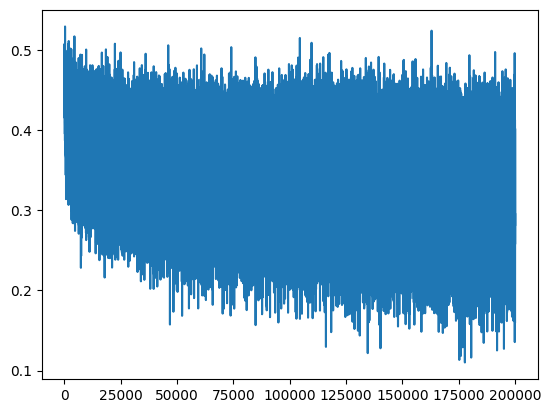

In [204]:
plt.plot(lossi)

In [205]:
-torch.tensor(1/27).log()

tensor(3.2958)

In [206]:
@torch.no_grad() # this decorator disables gradient tracking THIS REFERS TO WHATEVER HAPPENS IN THIS FUNCTION  TELLS PYTORCH THAT IT NERVER REQUIRES A GRADIENT 
def split_loss (split):
    x, y = {
        'train': (Xtr, Ytr),
        'val':(Xdev, Ydev),
        'test' :(Xte, Yte),
    } [split]
    emb = C [x] # (N, block_size, n_embd)
    embcat = emb.view (emb.shape[0], -1) # concat into (N, block_size* n_embd)
    h = torch.tanh(embcat @ W1 + b1) # (N, n_hidden)
    logits =h @ W2 + b2 # (N, vocab_size)
    loss = F.cross_entropy (logits, y)
    print(split, loss.item())
split_loss('train')
split_loss('val')

train 2.1413023471832275
val 2.2041380405426025


In [207]:
# ^^^ just written the same code for finding train loss and val loss in the same code block

In [208]:
#       Sample from the model

g= torch.Generator().manual_seed(2147483647 +10)

for _ in range(20):
    out=[]
    context= [0]* block_size
    while True:
        emb =C[torch.tensor([context])]
        h = torch.tanh (emb.view(1, -1) @ W1 + b1) 
        logits= h @ W2 +b2
        probs = F.softmax(logits , dim =1)
        ix=torch.multinomial(probs, num_samples=1, generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix== 0:
           break
    print(''.join(itos [i] for i in out))
        

mora.
kmyannie.
sand.
ryllarethan.
brerlee.
adee.
daelin.
shi.
jen.
eden.
van.
nar.
katellanker.
nyshah.
roshiransh.
jair.
jenell.
tauson.
brence.
ryyah.
